# UNET

## Càrrega de dades

En primer lloc hem de carregar les dades necessàries. Com hem comentat a l'enunciat

In [11]:
import cv2
import math
import numpy as np
import tensorflow as tf
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.transform import resize

## Descarregam les dades en una carpeta

In [1]:
# Primer ens hem de situar sobre una carpeta ja existent a Google drive
# teniu el codi a altres exemples
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/My Drive/ #posar la vostra carpeta


Mounted at /content/gdrive
/content/gdrive/My Drive/u_net_folder
/content/gdrive/My Drive/u_net_folder/unet_alumnes


In [3]:
!wget -q -O data.zip https://github.com/miquelmn/visio_per_computador/blob/master/in/DL/data.zip?raw=true
!unzip -q data.zip

In [4]:
!mkdir data
!mkdir data/train
!mkdir data/train/cells
!cp train/imgs/* data/train/cells

!mkdir data/mask
!mkdir data/mask/cells
!cp train/labels/* data/mask/cells

## Generador de les dades

In [7]:
from tensorflow.keras import utils as KU 
from tensorflow.keras.preprocessing import image as KIMG

class Generator(KU.Sequence):
    
    def __init__(self, size=(256, 256), batch_size=10, steps=100):
        self.__size = size
        self.__batch_size = batch_size
        self.__steps = steps

        train_datagen = KIMG.ImageDataGenerator(featurewise_center=False,
                                           featurewise_std_normalization=False,
                                           rotation_range=90,
                                           width_shift_range=0.1,
                                           height_shift_range=0.1,
                                           zoom_range=0.2)
        mask_datagen  = KIMG.ImageDataGenerator(featurewise_center=False,
                                           featurewise_std_normalization=False,
                                           rotation_range=90,
                                           width_shift_range=0.1,
                                           height_shift_range=0.1,
                                           zoom_range=0.2)

        self.__train_generator = train_datagen.flow_from_directory(
            './data/train',
            class_mode = None,
            target_size = self.__size,
            color_mode='grayscale',
            batch_size = self.__batch_size, # definimos un batch_size que sea adecuado al problema
            seed = 5)
        self.__mask_generator = mask_datagen.flow_from_directory(
            './data/mask',
            class_mode = None,
            target_size = self.__size,
            color_mode='grayscale',
            batch_size = self.__batch_size, # definimos un batch_size que sea adecuado al problema
            seed = 5)
    def __len__(self):
        return self.__steps

    def __getitem__(self, idx):
        train_generator = self.__train_generator
        mask_generator = self.__mask_generator

        img = next(train_generator)
        mask = next(mask_generator)
        # for img, mask in zip(train_generator, mask_generator):

        mask = mask.astype(np.float64)
        mask = mask / 255

        return img, mask

## Visualització

Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.


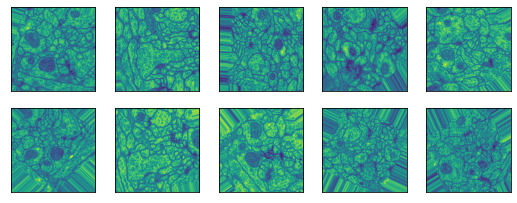

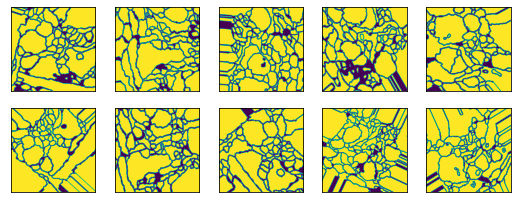

In [14]:
# Obtenim el primer batch del conjunt d'entrenament i visualitzam les imatges i 
# les segmentacions
for test in  Generator():
  break

n_images = 10

figure = plt.figure(1, figsize=(9, 9))

for i in range(n_images):
    
    ax = plt.subplot(int(n_images/2), n_images//2, i + 1)
    ax.imshow(test[0][i,:,:,0])
    ax.set_xticks(())
    ax.set_yticks(())

figure = plt.figure(2, figsize=(9, 9))

for i in range(n_images):
    
    ax = plt.subplot(int(n_images/2), n_images//2, i + 1)
    ax.imshow(test[1][i,:,:,0])
    ax.set_xticks(())
    ax.set_yticks(())